<a href="https://colab.research.google.com/github/Bakare-Opeyemi/Affirmations/blob/main/Hydraulic_Research_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Target_4: Hydraulic_Accumulator

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_validate,GridSearchCV,RandomizedSearchCV
from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Data Unloading

In [54]:
!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/00447/data.zip"
!unzip "data.zip"

--2023-04-23 23:56:22--  https://archive.ics.uci.edu/ml/machine-learning-databases/00447/data.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76601704 (73M) [application/x-httpd-php]
Saving to: ‘data.zip.1’

data.zip.1          100%[===================>]  73.05M  36.2MB/s    in 2.0s    

2023-04-23 23:56:25 (36.2 MB/s) - ‘data.zip.1’ saved [76601704/76601704]

Archive:  data.zip
replace CE.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: CE.txt                  
  inflating: CP.txt                  
  inflating: description.txt         
  inflating: EPS1.txt                
  inflating: FS1.txt                 
  inflating: FS2.txt                 
  inflating: profile.txt             
  inflating: PS1.txt                 
  inflating: PS2.txt                 
  inflating: PS3.txt                 
  inflating

## Getting the attribute data

In [55]:
#Unpacking data from all six pressure sensors
a=[]
for i in ["PS1","PS2","PS3","PS4","PS5","PS6"]:
    PS=np.genfromtxt(r"/content"+"/"+i+".txt")
    a.append(PS)
ps1,ps2,ps3,ps4,ps5,ps6=a

In [56]:
ps1

array([[151.47, 151.45, 151.52, ..., 151.1 , 151.21, 151.19],
       [151.11, 151.12, 151.16, ..., 150.79, 150.8 , 150.86],
       [150.81, 150.79, 150.84, ..., 150.43, 150.54, 150.62],
       ...,
       [151.73, 151.78, 151.84, ..., 151.73, 151.73, 151.83],
       [151.77, 151.77, 151.75, ..., 151.68, 151.71, 151.78],
       [151.83, 151.78, 151.77, ..., 151.73, 151.71, 151.7 ]])

In [57]:
#pressure sensor 1 has 6000nattributes, this is also true for all the other pressure sensors
len(ps1[0])

6000

In [58]:
len(ps1)

2205

In [59]:
#We represent each observation with its mean attribute
ps1_arr=ps1.mean(axis=1)
ps2_arr=ps2.mean(axis=1)
ps3_arr=ps3.mean(axis=1)
ps4_arr=ps4.mean(axis=1)
ps5_arr=ps5.mean(axis=1)
ps6_arr=ps6.mean(axis=1)

In [60]:
df = pd.DataFrame({"PS1":ps1_arr,"PS2":ps2_arr,"PS3":ps3_arr,"PS4":ps4_arr,"PS5":ps5_arr,"PS6":ps6_arr})

In [61]:
#Unpacking data from Motor power sensor
eps1 = np.genfromtxt(r"/content/EPS1.txt")
esp1_arr=eps1.mean(axis=1)

df["ESP1"]=esp1_arr

In [62]:
#Unpacking data from Volume flow sensors
a=[]
for i in ["FS1","FS2"]:
    FS=np.genfromtxt(r"/content"+"/"+i+".txt")
    a.append(FS)
fs1,fs2=a

fs1_arr=fs1.mean(axis=1)
fs2_arr=fs2.mean(axis=1)

df["FS1"]=fs1_arr
df["FS2"]=fs2_arr

In [63]:
#Unpacking data from Temperature sensors
a=[]
for i in ["TS1","TS2","TS3","TS4"]:
    TS=np.genfromtxt(r"/content"+"/"+i+".txt")
    a.append(TS)
ts1,ts2,ts3,ts4=a

ts1_arr=ts1.mean(axis=1)
ts2_arr=ts2.mean(axis=1)
ts3_arr=ts3.mean(axis=1)
ts4_arr=ts4.mean(axis=1)

df["TS1"]=ts1_arr
df["TS2"]=ts2_arr
df["TS3"]=ts3_arr
df["TS4"]=ts4_arr

In [64]:
#Unpacking data from Vibration sensor
vs1=np.genfromtxt(r"/content/VS1.txt")

vs1_arr=vs1.mean(axis=1)

df["VS1"]=vs1_arr

In [65]:
#Unpacking data from cooling efficiency sensor and cooling power sensor 
a=[]
for i in ["CE","CP"]:
    C=np.genfromtxt(r"/content"+"/"+i+".txt")
    a.append(C)
ce,cp=a

ce_arr=ce.mean(axis=1)

cp_arr=cp.mean(axis=1)

df["CE"]=ce_arr
df["CP"]=cp_arr

In [66]:
#Unpacking data from Efficiency factor
se=np.genfromtxt(r"/content/SE.txt")

se_arr=se.mean(axis=1)

df["SE"]=se_arr

## Processing Target Data

In [67]:
#Unpacking target data
target = np.genfromtxt(r"/content/profile.txt")
df_temp=pd.DataFrame(target,columns=["Cooler_Condition","Valve_Condition","Internal_Pump_Leakage","Hydraulic_Accumulator","Stable_Flag"])

#Adding target data to attribute data to present all data in a single dataframe
df_final=pd.concat([df,df_temp],axis=1)

## EDA && Feature Engineering

In [68]:
df_final.head(20)

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2,TS1,...,TS4,VS1,CE,CP,SE,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator,Stable_Flag
0,160.673492,109.466914,1.991475,0.000000e+00,9.842169,9.728098,2538.929167,6.709815,10.304592,35.621983,...,31.745250,0.576950,39.601350,1.862750,59.157183,3.0,100.0,0.0,130.0,1.0
1,160.603320,109.354890,1.976234,0.000000e+00,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,...,34.493867,0.565850,25.786433,1.255550,59.335617,3.0,100.0,0.0,130.0,1.0
2,160.347720,109.158845,1.972224,0.000000e+00,9.530548,9.427949,2519.928000,6.718522,10.366250,37.880800,...,35.646150,0.576533,22.218233,1.113217,59.543150,3.0,100.0,0.0,130.0,1.0
3,160.188088,109.064807,1.946576,0.000000e+00,9.438827,9.337429,2511.541633,6.720565,10.302678,38.879050,...,36.579467,0.569267,20.459817,1.062150,59.794900,3.0,100.0,0.0,130.0,1.0
4,160.000472,108.931434,1.922707,0.000000e+00,9.358762,9.260636,2503.449500,6.690308,10.237750,39.803917,...,37.427900,0.577367,19.787017,1.070467,59.455267,3.0,100.0,0.0,130.0,1.0
5,159.920210,108.887682,1.913285,0.000000e+00,9.301160,9.206877,2501.007067,6.699023,10.178720,40.659450,...,38.212067,0.572683,19.149683,1.072083,59.563333,3.0,100.0,0.0,130.0,1.0
6,159.672675,108.676466,1.888100,0.000000e+00,9.233942,9.143320,2494.416900,6.698573,10.140810,41.463633,...,38.932100,0.573033,18.666383,1.081683,59.789900,3.0,100.0,0.0,130.0,1.0
7,159.614452,108.651745,1.874894,0.000000e+00,9.194159,9.105058,2489.421533,6.678027,10.095978,42.215267,...,39.558967,0.572000,18.178433,1.078700,59.590617,3.0,100.0,0.0,130.0,1.0
8,159.475745,108.529738,1.858120,0.000000e+00,9.144616,9.057067,2484.419067,6.671652,10.039710,42.891983,...,40.080533,0.567067,18.334867,1.115083,59.608883,3.0,100.0,0.0,130.0,1.0
9,159.437997,108.510885,1.841063,0.000000e+00,9.104831,9.019265,2480.434867,6.659990,9.997762,43.532833,...,40.612550,0.571683,18.205733,1.129133,59.473733,3.0,100.0,0.0,130.0,1.0


In [69]:
df_final.corr()

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2,TS1,...,TS4,VS1,CE,CP,SE,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator,Stable_Flag
PS1,1.000000,0.995294,-0.719679,0.043416,-0.125801,-0.124423,0.831429,-0.924036,-0.224179,0.176661,...,0.171001,0.442242,-0.044862,-0.065850,-0.943953,-0.002000,-0.152883,0.311859,-0.198940,-0.232049
PS2,0.995294,1.000000,-0.767557,-0.020001,-0.200835,-0.199468,0.787771,-0.946450,-0.295798,0.250480,...,0.245184,0.503126,-0.119934,-0.137819,-0.957972,-0.075386,-0.098491,0.309810,-0.180580,-0.206720
PS3,-0.719679,-0.767557,1.000000,0.484111,0.755438,0.754532,-0.268738,0.921187,0.798910,-0.776377,...,-0.776001,-0.894019,0.697820,0.680701,0.884123,0.662852,0.163278,-0.355070,-0.006242,0.237027
PS4,0.043416,-0.020001,0.484111,1.000000,0.744478,0.744778,0.457372,0.198654,0.688770,-0.706899,...,-0.718159,-0.661116,0.814459,0.752728,0.125883,0.832446,-0.146385,0.154950,-0.001021,-0.244314
PS5,-0.125801,-0.200835,0.755438,0.744478,1.000000,0.999993,0.418587,0.461261,0.979715,-0.992716,...,-0.995100,-0.898647,0.973995,0.936972,0.377765,0.949962,0.020317,-0.016579,-0.209262,0.021458
PS6,-0.124423,-0.199468,0.754532,0.744778,0.999993,1.000000,0.419764,0.460014,0.979356,-0.992523,...,-0.994925,-0.898289,0.974220,0.937112,0.376471,0.950316,0.020284,-0.016262,-0.210282,0.021353
ESP1,0.831429,0.787771,-0.268738,0.457372,0.418587,0.419764,1.000000,-0.608338,0.325387,-0.371933,...,-0.377500,-0.077260,0.475030,0.433904,-0.677823,0.497514,-0.174618,0.426320,-0.239692,-0.267649
FS1,-0.924036,-0.946450,0.921187,0.198654,0.461261,0.460014,-0.608338,1.000000,0.545412,-0.505347,...,-0.500738,-0.710475,0.376376,0.382178,0.994564,0.330446,0.190141,-0.421702,0.092695,0.288568
FS2,-0.224179,-0.295798,0.798910,0.688770,0.979715,0.979356,0.325387,0.545412,1.000000,-0.994654,...,-0.991432,-0.921744,0.919353,0.876955,0.466177,0.881340,0.038651,-0.034926,-0.139471,0.055942
TS1,0.176661,0.250480,-0.776377,-0.706899,-0.992716,-0.992523,-0.371933,-0.505347,-0.994654,1.000000,...,0.999242,0.913102,-0.945977,-0.912048,-0.423296,-0.910865,-0.023876,0.019793,0.193597,-0.029021


<Axes: >

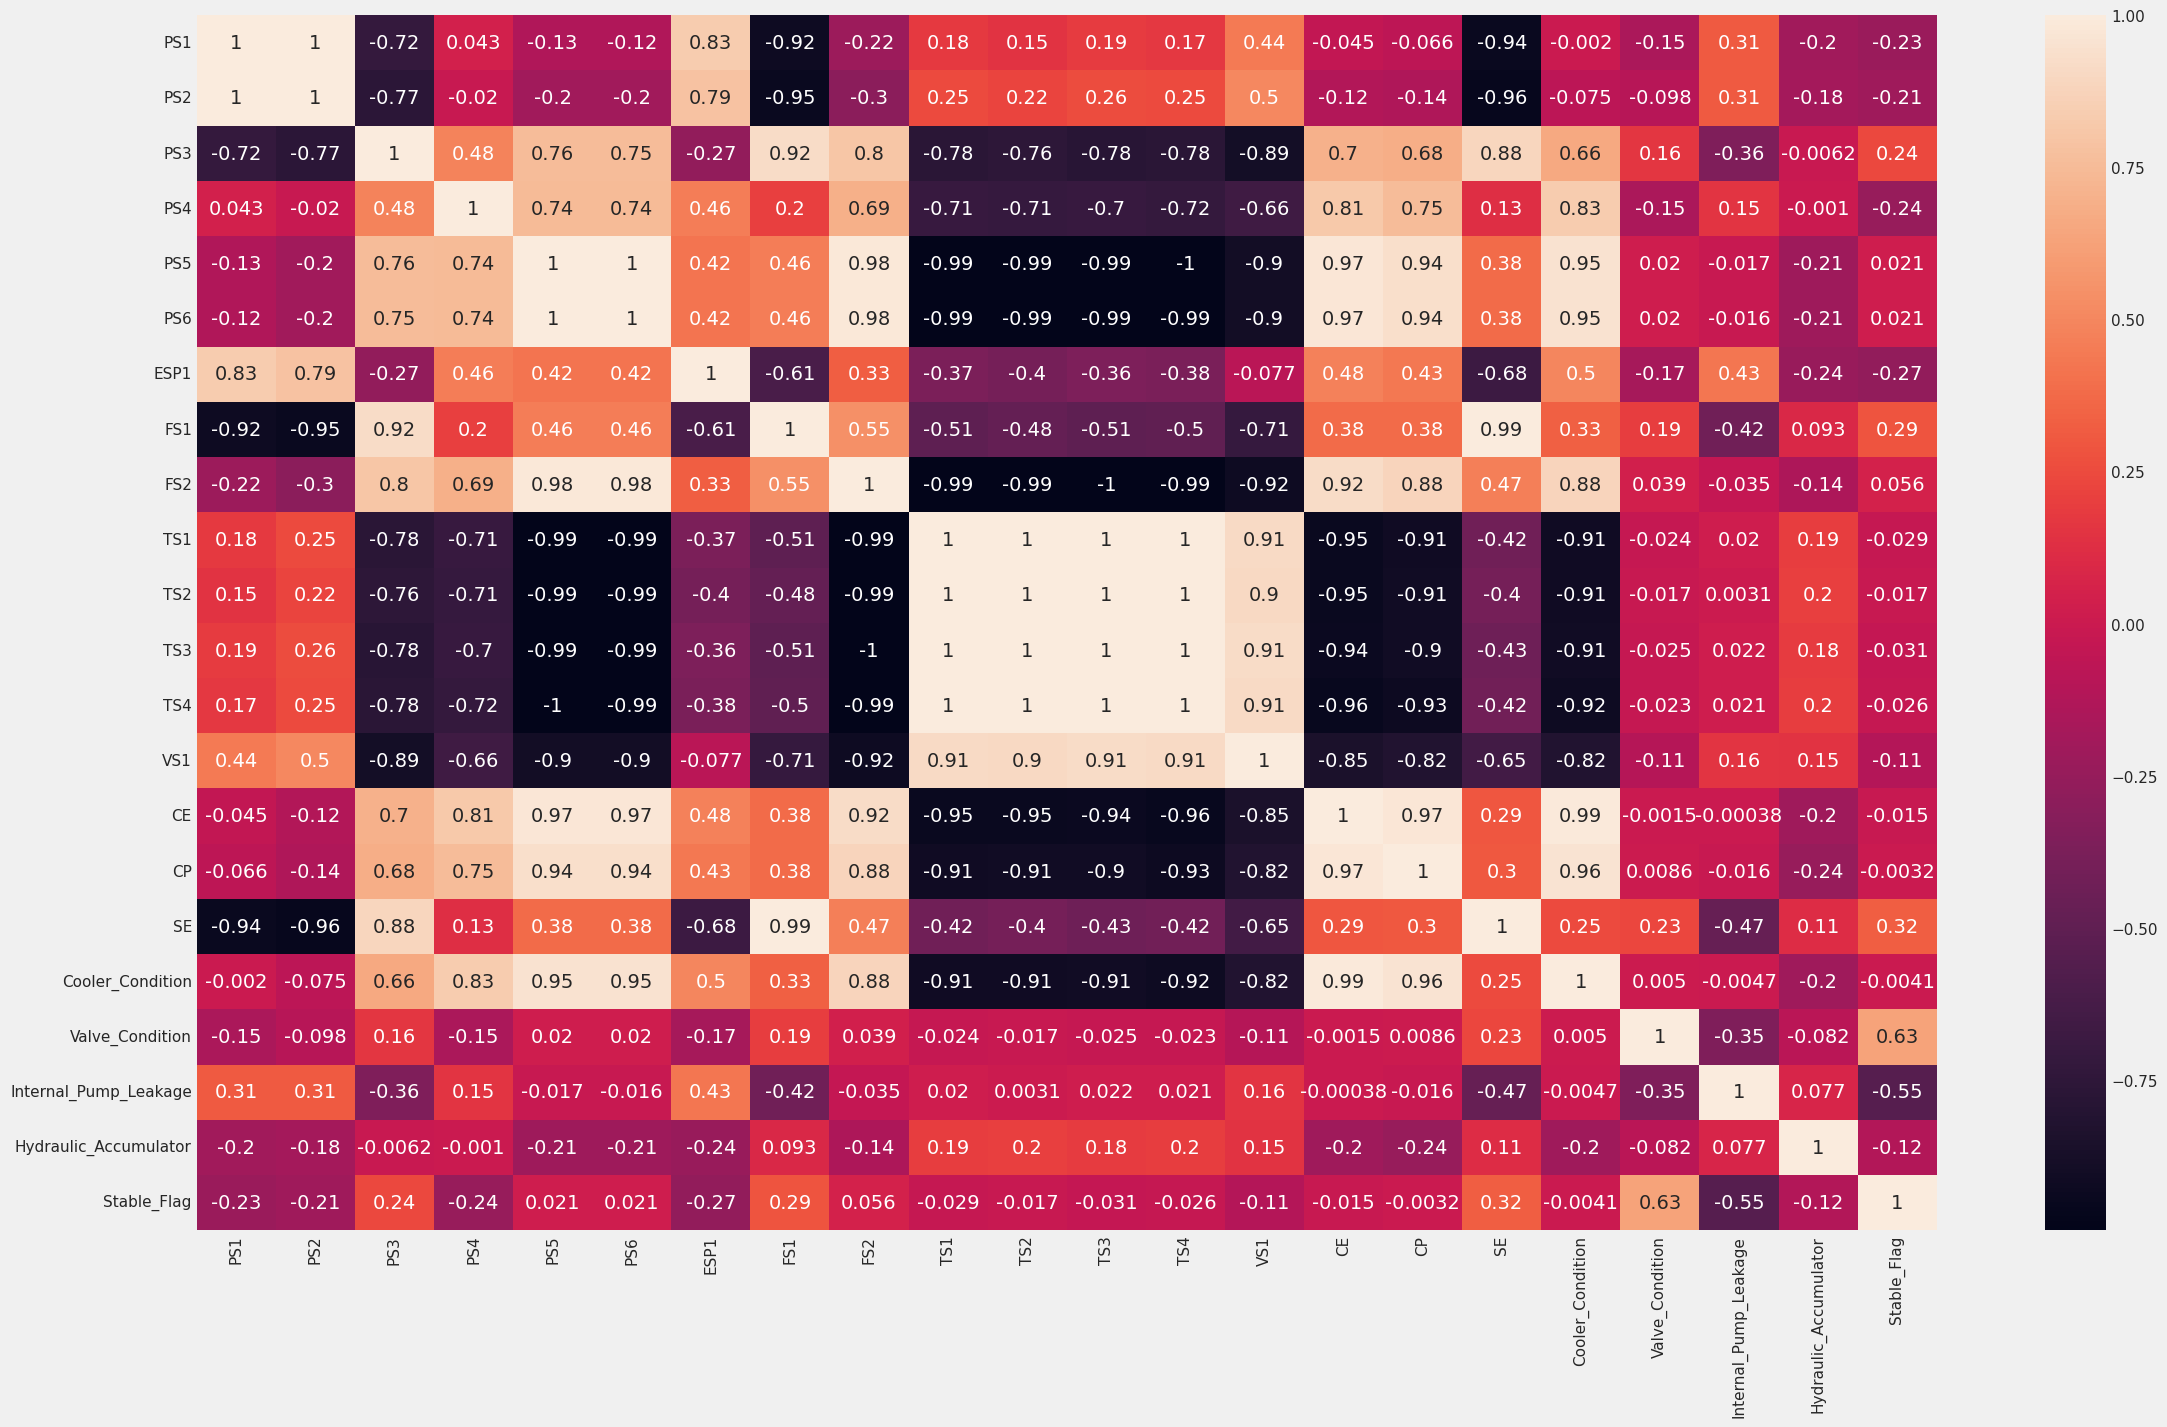

In [70]:
plt.style.use('fivethirtyeight')
fig=plt.gcf()
fig.set_size_inches((25,15))
sns.heatmap(df_final.corr(),annot=True)

### Observation
- From the correlation heatmap, we can see that all the temperature sensors have perfect positive correlation, thus we only need use one of the sensors to prepare the machine learning models
- The same thing can be observed with the pressure sensors PS5 and PS6 as well as PS1 and  PS2, so we'll apply the same technique to curb this problem

In [71]:
df_final.shape

(2205, 22)

In [72]:
df_final['PS1.5'] = (df_final['PS1'] + df_final['PS2'])/2
df_final['PS5.5'] = (df_final['PS5'] + df_final['PS6'])/2
df_final['TS'] = (df_final['TS1'] + df_final['TS2'] + df_final['TS3'] + df_final['TS4'])/4
df_final.drop(columns=['PS1','TS3','TS4', 'PS2','PS5','PS6','TS1','TS2'], inplace = True)
df_final.shape

(2205, 17)

<Axes: >

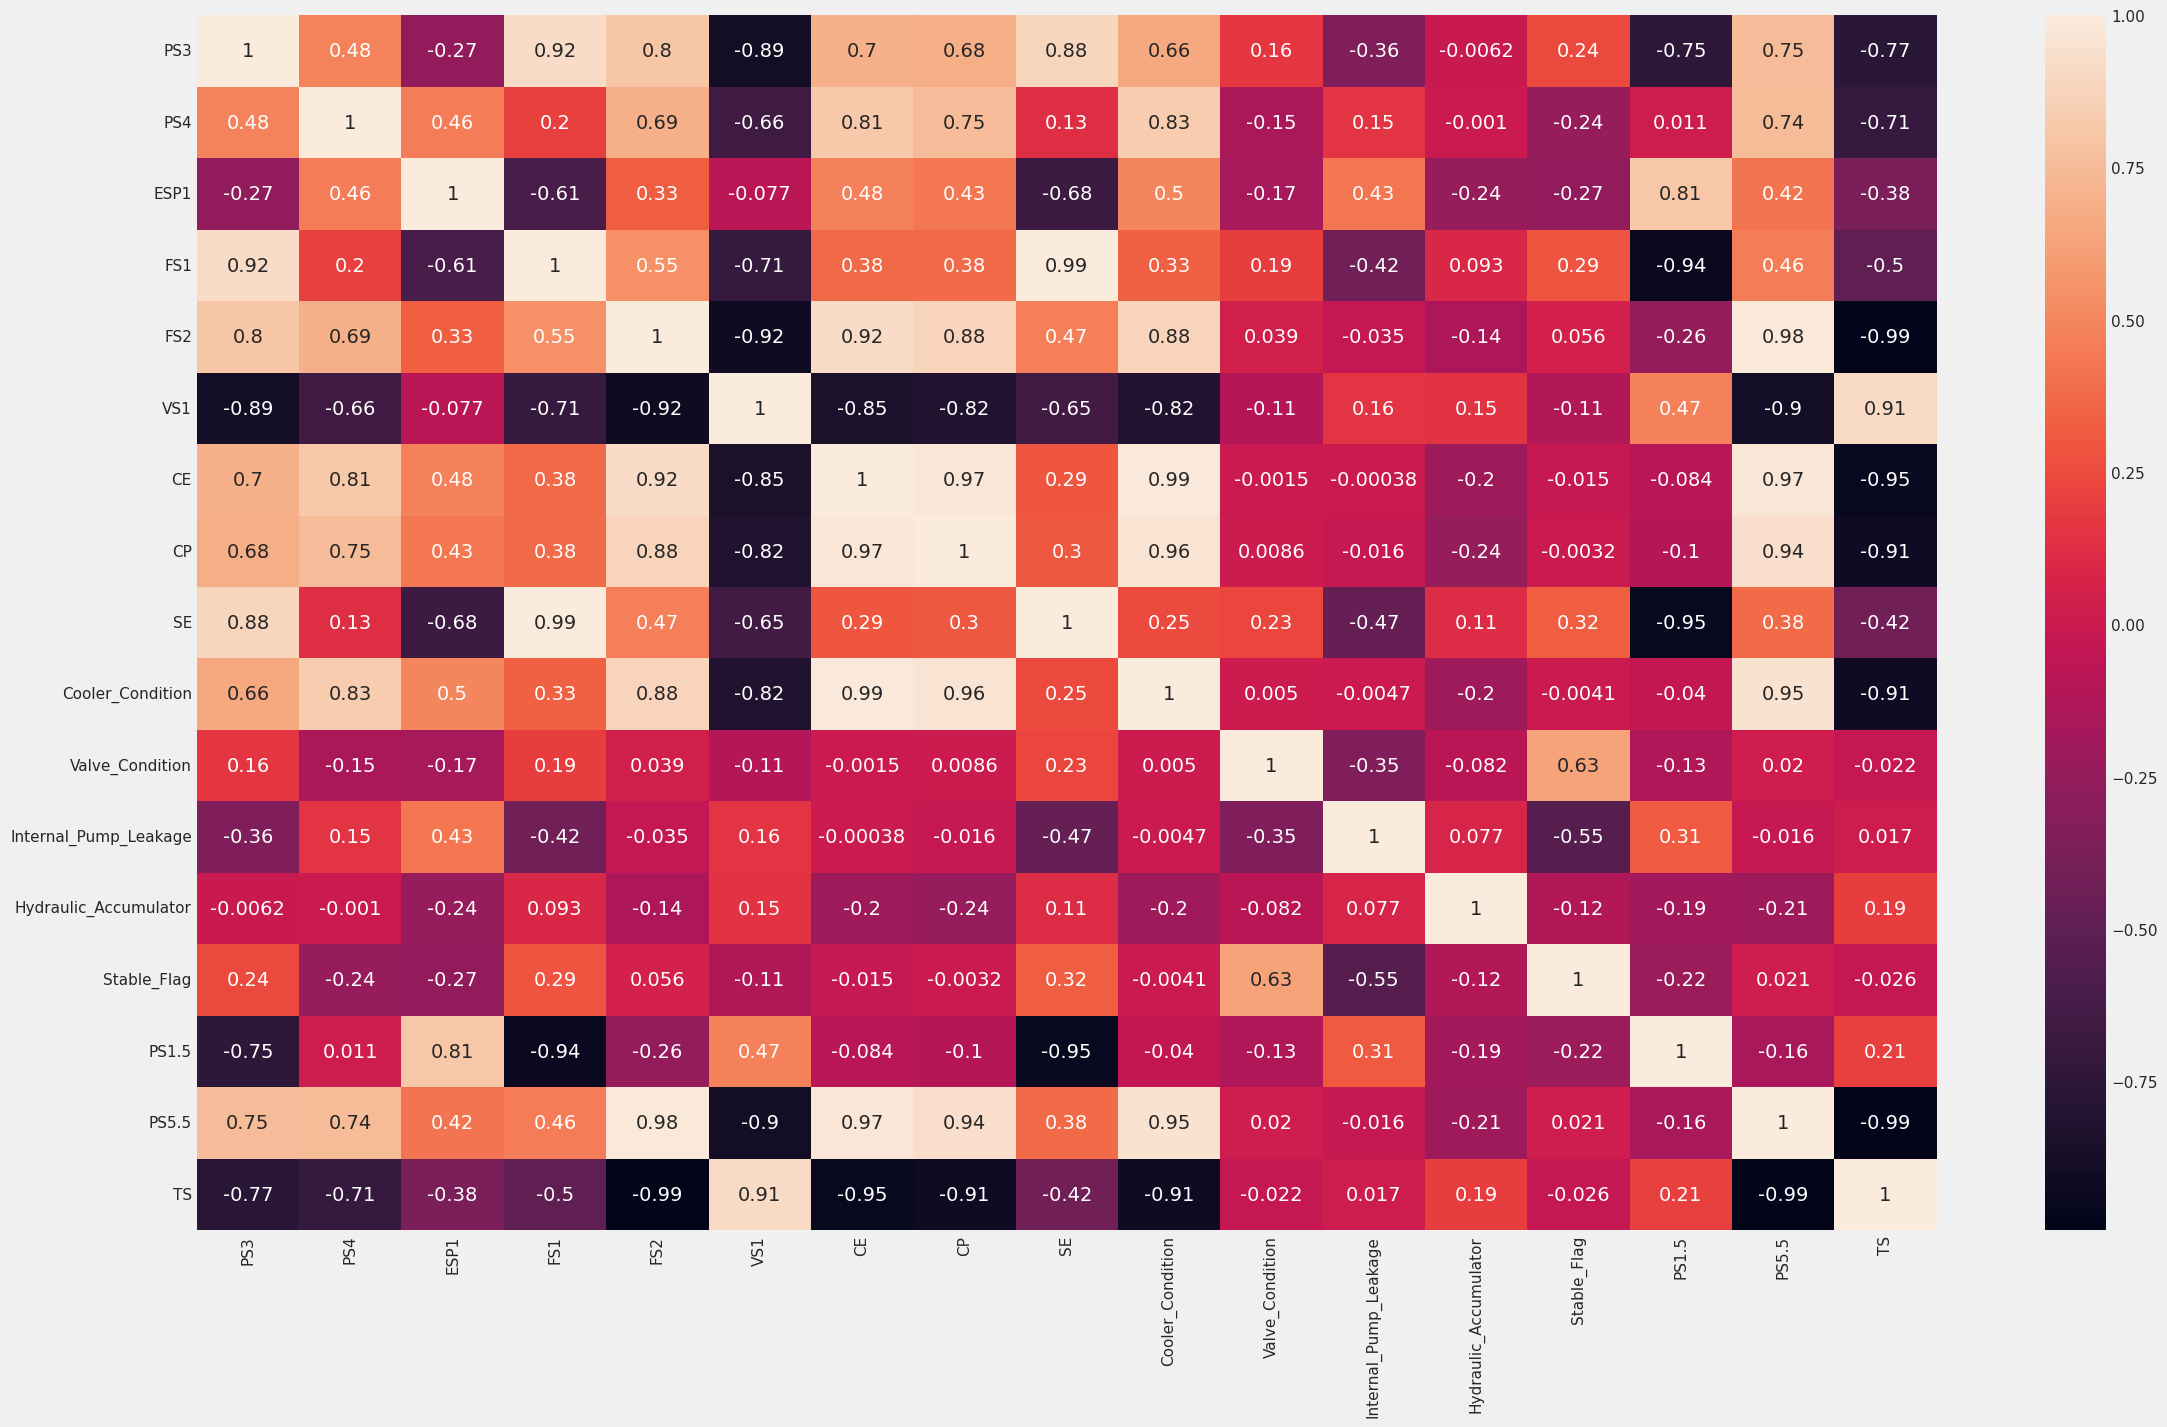

In [73]:
fig=plt.gcf()
fig.set_size_inches((25,15))
sns.heatmap(df_final.corr(),annot=True)

In [74]:
#Creating a new feature virtual cooling sensor(VCS) which is an average of CE and CP
df_final['VCS'] = (df_final['CE'] + df_final['CP'])/2

df_final.drop(columns=['CE','CP'], inplace = True)
df_final.shape

(2205, 16)

<Axes: >

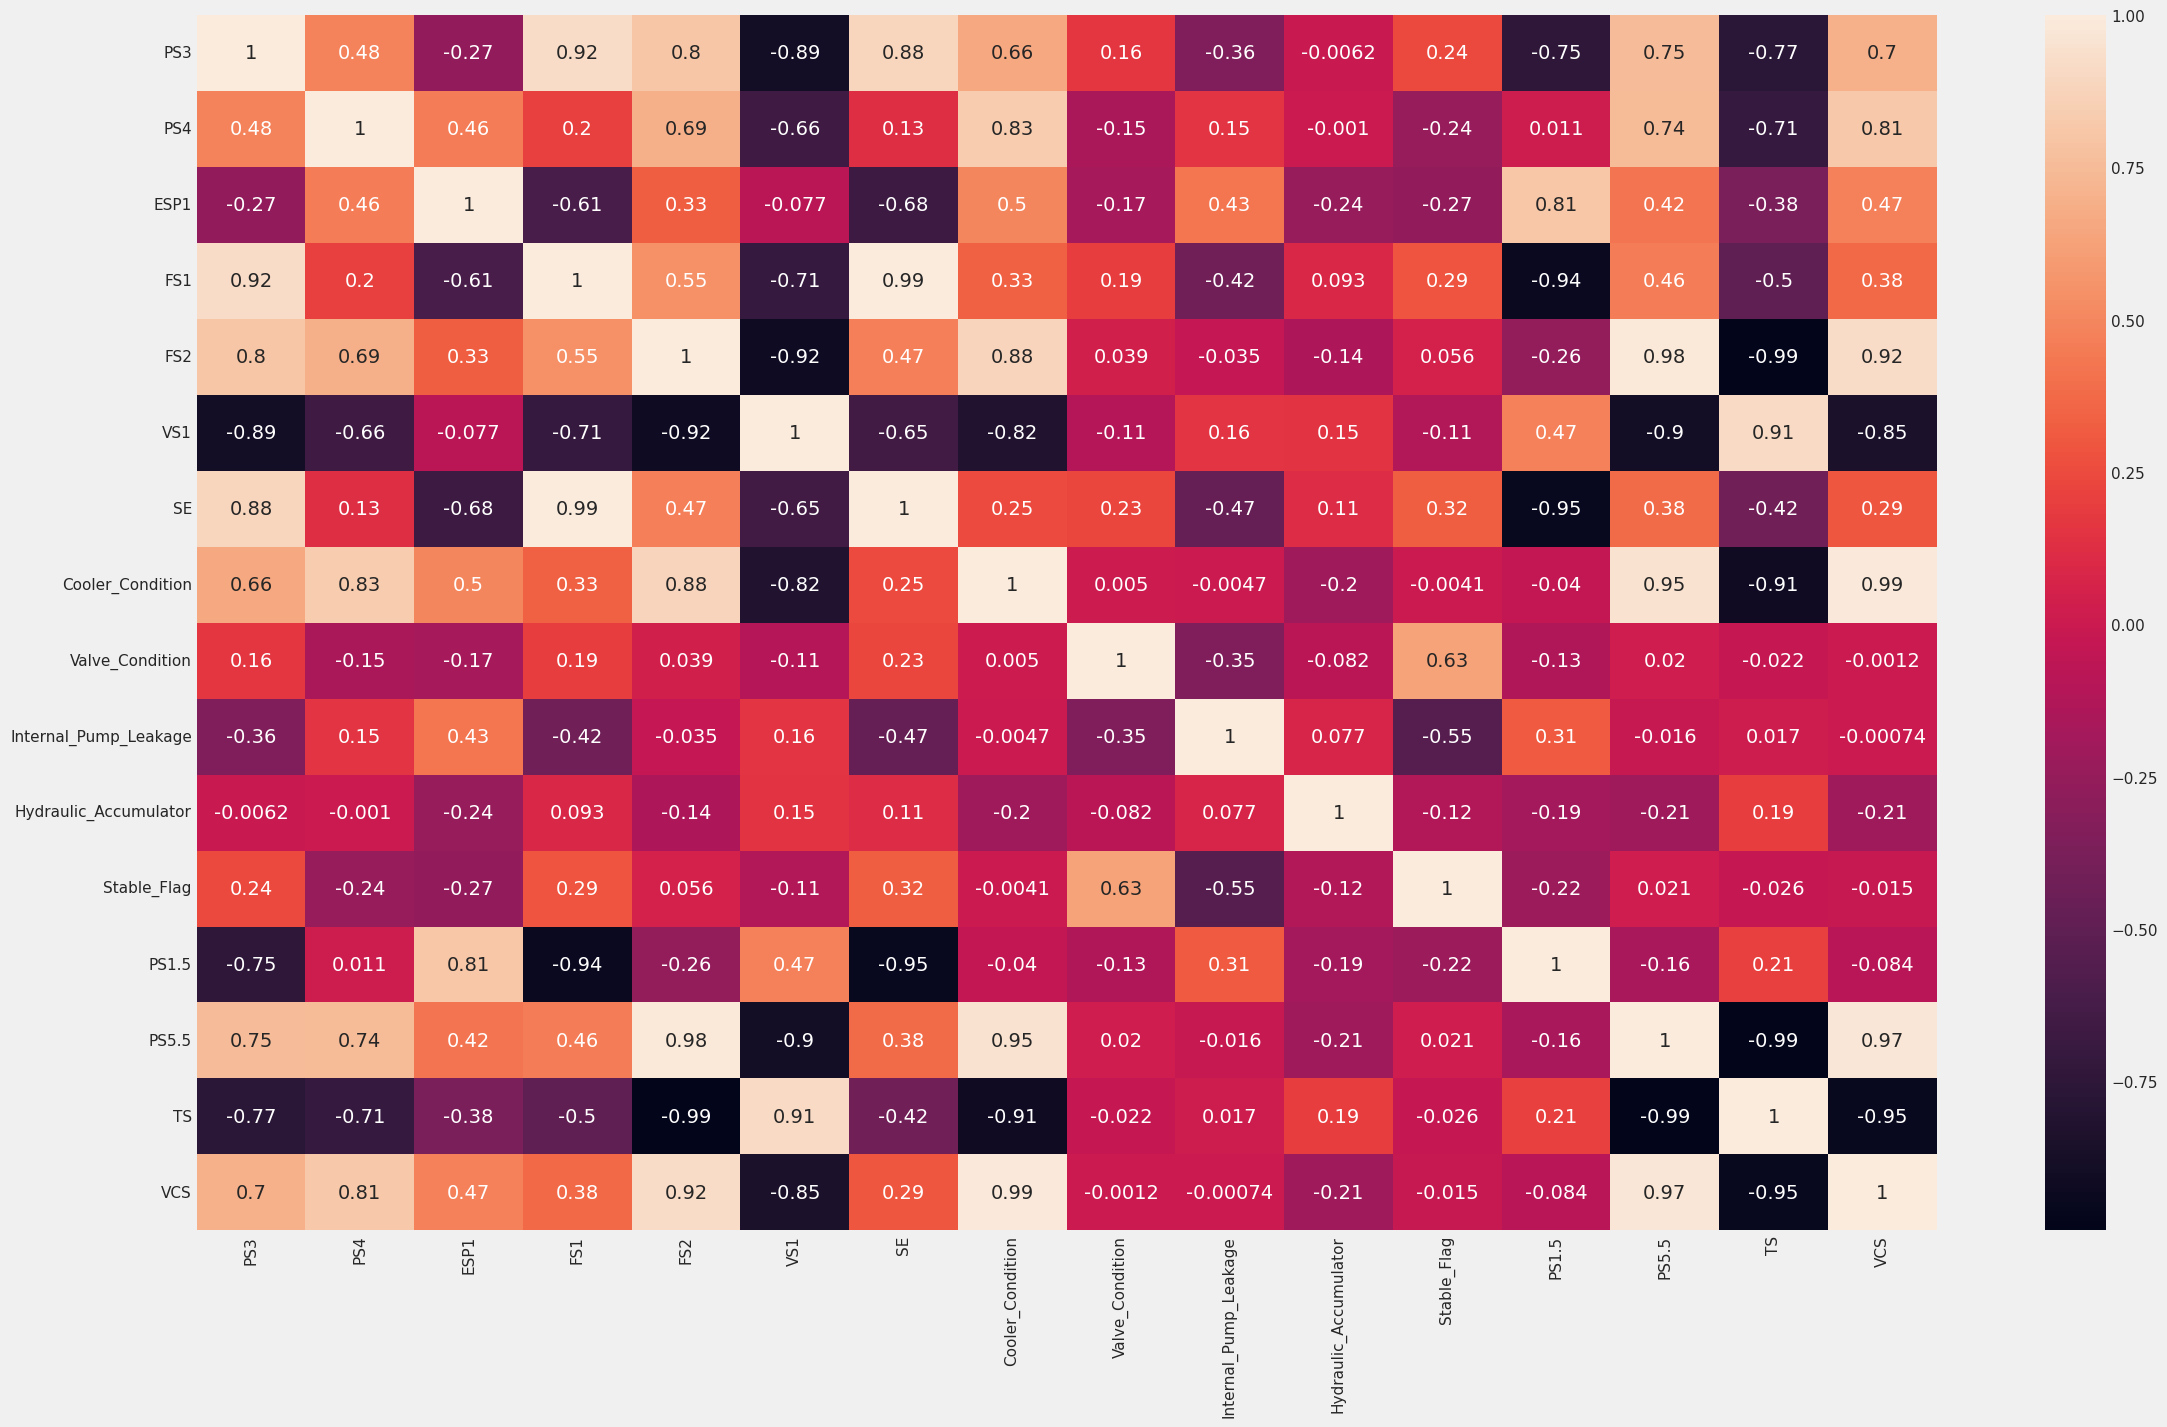

In [75]:
fig=plt.gcf()
fig.set_size_inches((25,15))
sns.heatmap(df_final.corr(),annot=True)

### Explanation

When two or more features in a dataset have very high correlation values, it means that they are highly dependent on each other and contain similar information. This can lead to a phenomenon known as "multicollinearity" in linear regression models, where the coefficients of the correlated features become unstable and difficult to interpret. This can also lead to overfitting in other types of models, as the model may rely too heavily on one feature when making predictions.

- In this study, we mitigate this issue by calculating the averages of the features which are highly correlated to create new features before dropping the correlating features

## Data Preprocessing

In [76]:
y= df_final.iloc[:,7:12]
x = df_final[['PS1.5','PS3',	'PS4', 'PS5.5',	'ESP1',	'FS1',	'FS2', 'TS',	'VS1',	'SE', 'VCS']]

In [77]:
y

,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator,Stable_Flag
0,3.0,100.0,0.0,130.0,1.0
1,3.0,100.0,0.0,130.0,1.0
2,3.0,100.0,0.0,130.0,1.0
3,3.0,100.0,0.0,130.0,1.0
4,3.0,100.0,0.0,130.0,1.0
...,...,...,...,...,...
2200,100.0,100.0,0.0,90.0,0.0
2201,100.0,100.0,0.0,90.0,0.0
2202,100.0,100.0,0.0,90.0,0.0
2203,100.0,100.0,0.0,90.0,0.0


In [78]:
target_1=y.iloc[:,-5]
target_2=y.iloc[:,-4]
target_3=y.iloc[:,-3]
target_4=y.iloc[:,-2]

final_target=y.iloc[:,-1]
final_target=(final_target.astype(int))

In [79]:
round((target_4.value_counts(normalize=True)), 4)

90.0     0.3664
130.0    0.2717
115.0    0.1810
100.0    0.1810
Name: Hydraulic_Accumulator, dtype: float64

In [80]:
def findReplace(item):
  if item == 90.0:
    k = 0
  elif item == 100.0:
    k = 1
  elif item == 115.0:
    k = 2
  else:
    k = 3
  return k

In [81]:
hydraulicTarget = [findReplace(item) for item in target_4]

In [82]:
train_x,test_x,train_y,test_y=train_test_split(x,hydraulicTarget,test_size=0.25,random_state=1)

In [83]:
final_df = x.copy()
final_df['target'] = hydraulicTarget
final_df.head()

,PS1.5,PS3,PS4,PS5.5,ESP1,FS1,FS2,TS,VS1,SE,VCS,target
0,135.070203,1.991475,0.0,9.785134,2538.929167,6.709815,10.304592,36.704254,0.576950,59.157183,20.732050,3
1,134.979105,1.976234,0.0,9.582315,2531.498900,6.715315,10.403098,37.920642,0.565850,59.335617,13.520992,3
2,134.753282,1.972224,0.0,9.479248,2519.928000,6.718522,10.366250,38.900338,0.576533,59.543150,11.665725,3
3,134.626448,1.946576,0.0,9.388128,2511.541633,6.720565,10.302678,39.816471,0.569267,59.794900,10.760983,3
4,134.465953,1.922707,0.0,9.309699,2503.449500,6.690308,10.237750,40.718779,0.577367,59.455267,10.428742,3


In [84]:
import torch
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, data):
        self.df = data
        self.df_labels = data[['target']]
        self.dataset = torch.tensor(data.drop('target', axis = 1).to_numpy()).float()
        self.labels = torch.tensor(data[['target']].to_numpy().reshape(-1)).long()

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        # Return a tuple of the data from the dataframe at the given index
        return (self.dataset[idx], self.labels[idx])
        #return (self.dataset[idx,-1], self.labels[idx,-1])

In [85]:
train_df = train_x.copy()
train_df['target'] = train_y
train_df['target'] = train_df['target']


test_df = test_x.copy()
test_df['target'] = test_y
test_df['target'] = test_df['target']

In [86]:
train_df.columns

Index(['PS1.5', 'PS3', 'PS4', 'PS5.5', 'ESP1', 'FS1', 'FS2', 'TS', 'VS1', 'SE',
       'VCS', 'target'],
      dtype='object')

In [87]:
train_df.head()

,PS1.5,PS3,PS4,PS5.5,ESP1,FS1,FS2,TS,VS1,SE,VCS,target
470,130.984428,1.746379,0.0,8.447794,2387.201833,6.586752,9.046910,56.407192,0.663483,59.812117,10.524125,1
1210,132.726337,1.727134,0.0,9.146497,2497.309233,6.348973,9.725960,44.971658,0.608067,55.374867,14.515508,1
1452,133.417626,1.802708,0.0,9.091907,2470.413433,6.666505,9.732885,45.363158,0.599600,59.631233,14.739192,0
91,131.861753,1.715391,0.0,8.602688,2410.361967,6.605630,9.280190,53.342975,0.648083,60.163317,11.289783,3
435,130.729488,1.751892,0.0,8.426229,2386.188900,6.548942,9.004765,56.920796,0.664933,58.804017,10.138575,2


In [88]:
print(train_df.shape)
print(test_df.shape)

(1653, 12)
(552, 12)


In [89]:
# Create custom datasets for the training and test sets
train_dataset = CustomDataset(train_df)
test_dataset = CustomDataset(test_df)

# Create DataLoaders for the training and test sets
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True, drop_last=True)

## Model Development (TARGET1 - Cooler Condition)

In [90]:
!pip install snntorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [91]:
# imports
import snntorch as snn
from snntorch import spikeplot as splt
from snntorch import spikegen

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
import numpy as np
import itertools

In [92]:
# Leaky neuron model, overriding the backward pass with a custom function
class LeakySurrogate(nn.Module):
  def __init__(self, beta, threshold=1.0):
      super(LeakySurrogate, self).__init__()

      # initialize decay rate beta and threshold
      self.beta = beta
      self.threshold = threshold
      self.spike_op = self.SpikeOperator.apply
  
  # the forward function is called each time we call Leaky
  def forward(self, input_, mem):
    spk = self.spike_op((mem-self.threshold))  # call the Heaviside function
    reset = (spk * self.threshold).detach() # removes spike_op gradient from reset
    mem = self.beta * mem + input_ - reset # Eq (1)
    return spk, mem

  # Forward pass: Heaviside function
  # Backward pass: Override Dirac Delta with the Spike itself
  @staticmethod
  class SpikeOperator(torch.autograd.Function):
      @staticmethod
      def forward(ctx, mem):
          spk = (mem > 0).float() # Heaviside on the forward pass: Eq(2)
          ctx.save_for_backward(spk)  # store the spike for use in the backward pass
          return spk

      @staticmethod
      def backward(ctx, grad_output):
          (spk,) = ctx.saved_tensors  # retrieve the spike 
          grad = grad_output * spk # scale the gradient by the spike: 1/0
          return grad

In [93]:
# Network Architecture
num_inputs = 11
num_hidden = 100
num_outputs = 4
batch_size = 32

# Temporal Dynamics
num_steps = 25
beta = 0.95

In [94]:
# Define Network
class Net(nn.Module):
    def __init__(self):
        super().__init__()

        # Initialize layers
        self.fc1 = nn.Linear(num_inputs, num_hidden)
        self.lif1 = snn.Leaky(beta=beta)
        self.fc2 = nn.Linear(num_hidden, num_outputs)
        self.lif2 = snn.Leaky(beta=beta)

    def forward(self, x):
        #x = x.reshape(x.size(0), -1, num_inputs)
        # Initialize hidden states at t=0
        mem1 = self.lif1.init_leaky()
        mem2 = self.lif2.init_leaky()
        
        # Record the final layer
        spk2_rec = []
        mem2_rec = []

        for step in range(num_steps):
            
            cur1 = self.fc1(x)
            spk1, mem1 = self.lif1(cur1, mem1)
            cur2 = self.fc2(spk1)
            spk2, mem2 = self.lif2(cur2, mem2)
            spk2_rec.append(spk2)
            mem2_rec.append(mem2)

        return torch.stack(spk2_rec, dim=0), torch.stack(mem2_rec, dim=0)
        
# Load the network onto CUDA if available
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
net = Net().to(device)

In [95]:
dtype = torch.float
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [96]:
# pass data into the network, sum the spikes over time
# and compare the neuron with the highest number of spikes
# with the target

def print_batch_accuracy(data, targets, train=False):
    output, _ = net(data.view(batch_size, -1))
    _, idx = output.sum(dim=0).max(1)
    acc = np.mean((targets == idx).detach().cpu().numpy())

    if train:
        print(f"Train set accuracy for a single minibatch: {acc*100:.2f}%")
    else:
        print(f"Validation set accuracy for a single minibatch: {acc*100:.2f}%")

def train_printer(
    data, targets, epoch,
    counter, iter_counter,
        loss_hist, test_loss_hist, test_data, test_targets):
    print(f"Epoch {epoch}, Iteration {iter_counter}")
    print(f"Train Set Loss: {loss_hist[counter]:.2f}")
    print(f"Validation Set Loss: {test_loss_hist[counter]:.2f}")
    print_batch_accuracy(data, targets, train=True)
    print_batch_accuracy(test_data, test_targets, train=False)
    print("\n")

In [97]:
loss = nn.CrossEntropyLoss()

In [98]:
optimizer = torch.optim.Adam(net.parameters(), lr=5e-4, betas=(0.9, 0.999))

In [99]:
data, targets = next(iter(train_loader))
data = data.to(device)
targets = targets.to(device)

In [100]:
batch_size = 32

In [101]:
spk_rec, mem_rec = net(data.view(batch_size, -1))
print(mem_rec.size())

torch.Size([25, 32, 4])


In [102]:
# initialize the total loss value
loss_val = torch.zeros((1), dtype=dtype, device=device)
targets = targets.long()
# sum loss at every step
for step in range(num_steps):
  loss_val += loss(mem_rec[step].to(torch.float32), targets)

print(f"Training loss: {loss_val.item():.3f}")

Training loss: 39.314


In [103]:
print_batch_accuracy(data, targets, train=True)

Train set accuracy for a single minibatch: 18.75%


In [104]:
# clear previously stored gradients
optimizer.zero_grad()

# calculate the gradients
loss_val.backward()

# weight update
optimizer.step()

In [105]:
# calculate new network outputs using the same data
spk_rec, mem_rec = net(data.view(batch_size, -1))

# initialize the total loss value
loss_val = torch.zeros((1), dtype=dtype, device=device)

# sum loss at every step
for step in range(num_steps):
  loss_val += loss(mem_rec[step].to(torch.float32), targets)

print(f"Training loss: {loss_val.item():.3f}")
print_batch_accuracy(data, targets.float(), train=True)

Training loss: 37.943
Train set accuracy for a single minibatch: 40.62%


In [106]:
targets

tensor([0, 0, 3, 0, 3, 1, 2, 3, 3, 2, 3, 2, 0, 2, 0, 1, 3, 0, 3, 2, 0, 2, 0, 3,
        3, 0, 3, 3, 3, 3, 0, 0])

In [107]:
num_epochs = 21
loss_hist = []
test_loss_hist = []
counter = 0

# Outer training loop
for epoch in range(num_epochs):
    iter_counter = 1
    #train_batch = next(iter(train_loader))

    # Minibatch training loop
    for data, targets in train_loader:
        data = data.to(device).to(torch.float32)
        targets = targets.to(device).to(torch.float32)

        # forward pass
        net.train()
        spk_rec, mem_rec = net(data.view(batch_size, 11))

        # initialize the loss & sum over time
        loss_val = torch.zeros((1), dtype=dtype, device=device)
        targets = targets.long()
        for step in range(num_steps):
            
            loss_val += loss(mem_rec[step].to(torch.float32), targets)

        # Gradient calculation + weight update
        optimizer.zero_grad()
        loss_val.backward()
        optimizer.step()

        # Store loss history for future plotting
        loss_hist.append(loss_val.item())

        # Test set
        with torch.no_grad():
            net.eval()
            test_data, test_targets = next(iter(test_loader))
            test_data = test_data.to(device).to(torch.float32)
            test_targets = test_targets.to(device).to(torch.float32)

            # Test set forward pass
            test_spk, test_mem = net(test_data.view(batch_size, -1))

            # Test set loss
            test_loss = torch.zeros((1), dtype=dtype, device=device)
            for step in range(num_steps):
                test_loss += loss(test_mem[step].to(torch.float32), test_targets.long())
            test_loss_hist.append(test_loss.item())

            # Print train/test loss/accuracy
            if counter % 50 == 0:
                train_printer(
                    data, targets, epoch,
                    counter, iter_counter,
                    loss_hist, test_loss_hist,
                    test_data, test_targets)
          
            counter += 1
            iter_counter +=1

Epoch 0, Iteration 1
Train Set Loss: 39.13
Validation Set Loss: 38.62
Train set accuracy for a single minibatch: 18.75%
Validation set accuracy for a single minibatch: 28.12%


Epoch 0, Iteration 51
Train Set Loss: 32.06
Validation Set Loss: 33.89
Train set accuracy for a single minibatch: 43.75%
Validation set accuracy for a single minibatch: 37.50%


Epoch 1, Iteration 50
Train Set Loss: 31.93
Validation Set Loss: 33.43
Train set accuracy for a single minibatch: 40.62%
Validation set accuracy for a single minibatch: 28.12%


Epoch 2, Iteration 49
Train Set Loss: 33.03
Validation Set Loss: 35.31
Train set accuracy for a single minibatch: 53.12%
Validation set accuracy for a single minibatch: 40.62%


Epoch 3, Iteration 48
Train Set Loss: 33.76
Validation Set Loss: 33.26
Train set accuracy for a single minibatch: 46.88%
Validation set accuracy for a single minibatch: 40.62%


Epoch 4, Iteration 47
Train Set Loss: 34.43
Validation Set Loss: 30.55
Train set accuracy for a single minibatc

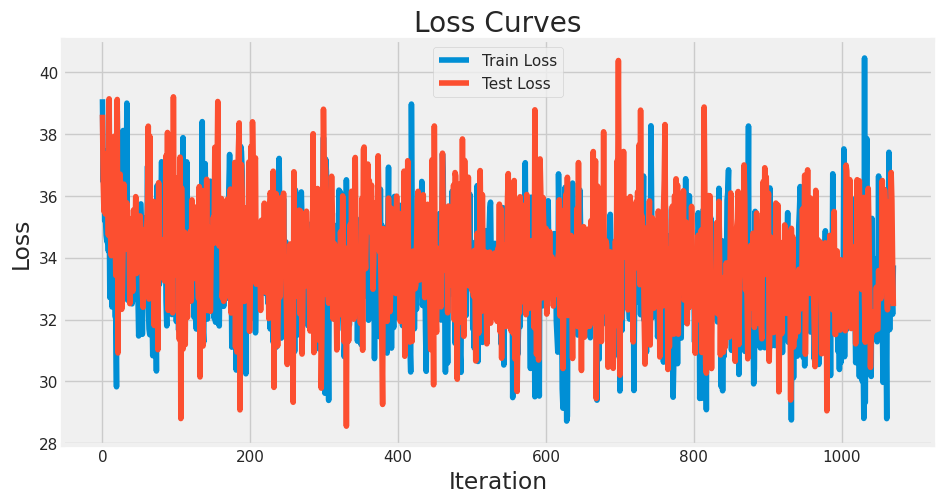

In [108]:
# Plot Loss
fig = plt.figure(facecolor="w", figsize=(10, 5))
plt.plot(loss_hist)
plt.plot(test_loss_hist)
plt.title("Loss Curves")
plt.legend(["Train Loss", "Test Loss"])
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

## Accuracy on Previously Unseen Data




In [109]:
total = 0
correct = 0
cooler_prediction = []
cooler_actual = []

# drop_last switched to False to keep all samples
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True, drop_last=False)
#test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True, drop_last=True)

with torch.no_grad():
  net.eval()
  for data, targets in test_loader:
    data = data.to(device)
    targets = targets.to(device)
    
    # forward pass
    test_spk, _ = net(data.view(data.size(0), -1))

    # calculate total accuracy
    _, predicted = test_spk.sum(dim=0).max(1)
    total += targets.size(0)
    correct += (predicted == targets).sum().item()
    #save actual and predicted targets for each batch
    cooler_prediction.extend([y.item() for y in predicted])
    cooler_actual.extend([x.item() for x in targets])

print(f"Total correctly classified test data: {correct}/{total}")
print(f"Test Set Accuracy: {100 * correct / total:.2f}%")


Total correctly classified test data: 254/552
Test Set Accuracy: 46.01%
